In [233]:
import numpy as np
import matplotlib.pyplot as plt

# FBD Analysis

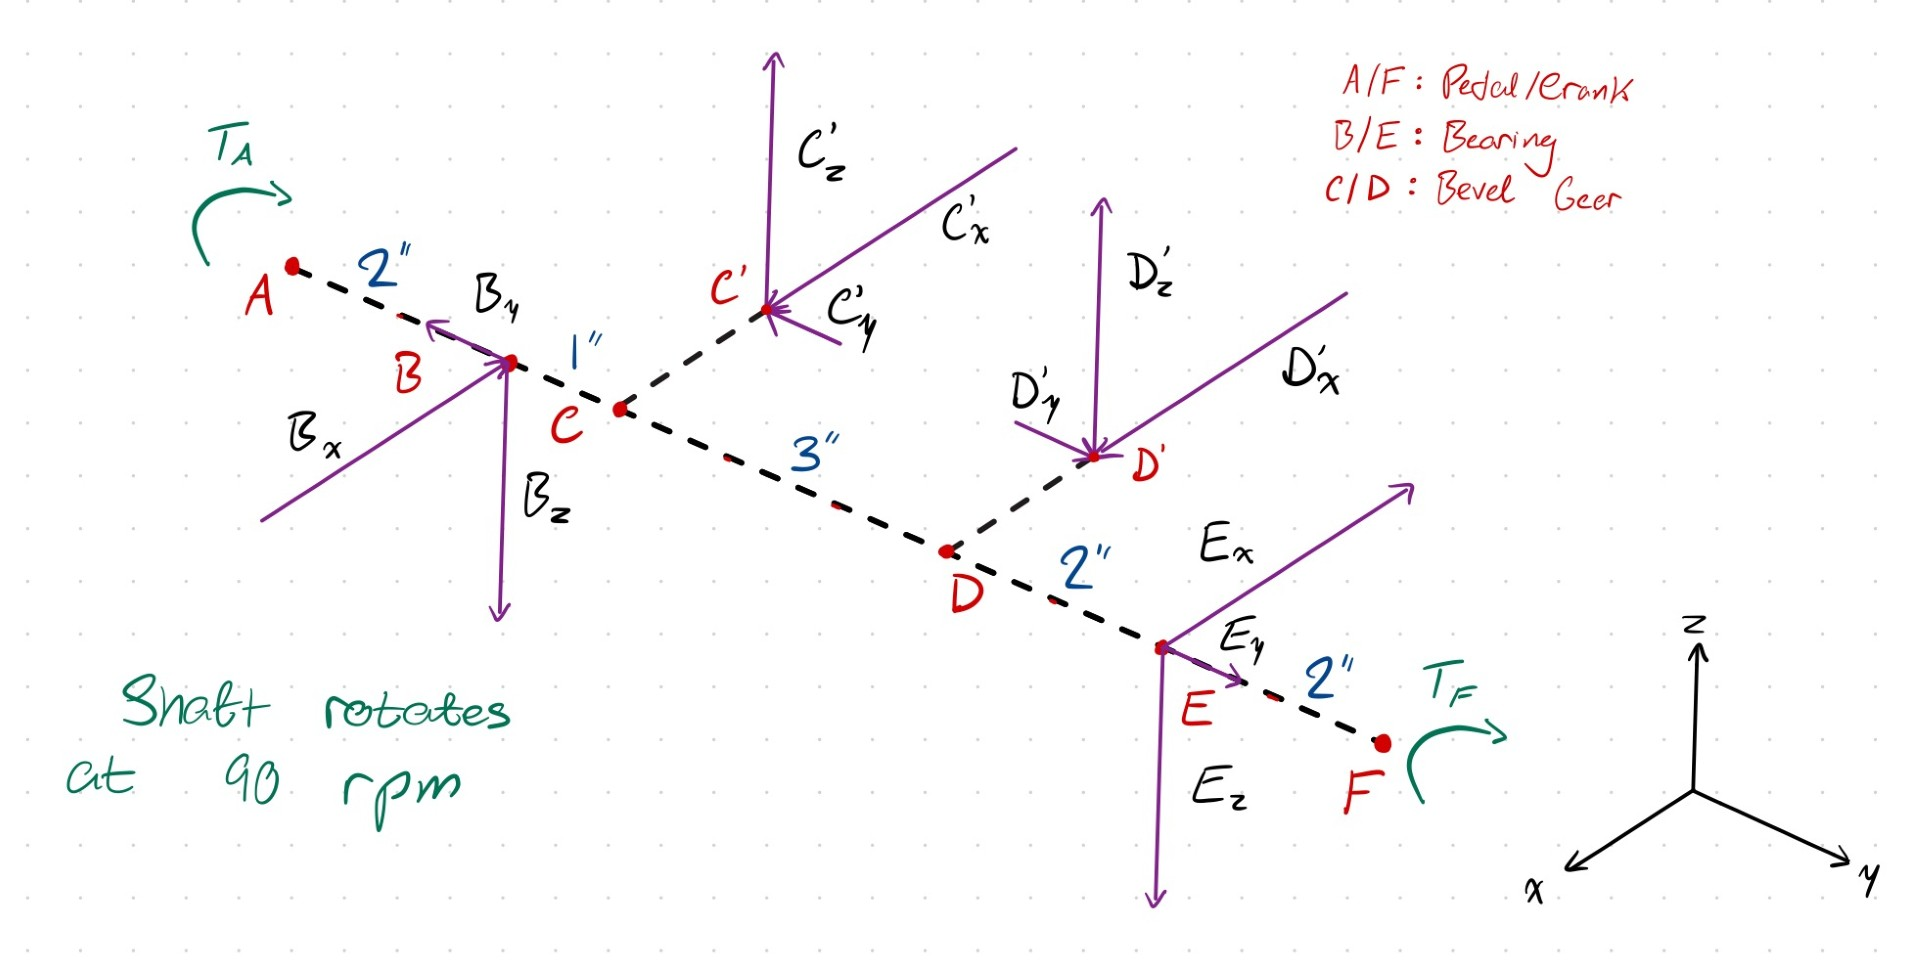

## Reaction Forces (lbf)

In [234]:
Cx = 165.2 # Wr
Cy = 82.6 # Wx
Cz = 507.5 # Wt
Dx = 233.9 # Wr
Dy = 116.9 # Wx
Dz = 718.5 # Wt

## Distances (inch)

In [235]:
AB = 2 
BC = 1
CD = 3
DE = 2
EF = 2
CC = 0.832 #R_mc
DD = 0.457 #R_md

## Force and Moment Equations

Assume axial load is entirely on bearing B

In [236]:
By = Cy - Dy #lbf
Ey = 0


$\Sigma F_x = 0 = -B_x + C_x + D_x -E_x$

$\Sigma F_z = 0 = -B_z + C_z + D_z -E_z$

Take moments about B

$\Sigma M_x = 0 = \vec{BC} \cdot C_z + \vec{BD} \cdot D_z +\vec{BE} \cdot E_z$

$\Sigma M_y = 0 = \vec{CC} \cdot C_z + \vec{DD} \cdot D_z + T_A - T_F$

$T_A = T_F$

$\Sigma M_z = 0 = \vec{BC} \cdot C_x + \vec{BD} \cdot D_x +\vec{BE} \cdot E_x$


In [237]:
BD = (BC+CD)
BE = (BC+CD+DE)

A = np.array([
    [ 1,   0,   1,   0,   0,   0],
    [ 0,   1,   0,   1,   0,   0],
    [ 0,   0,   0,  BE,   0,   0],
    [ 0,   0,   0,   0,   1,  -1],
    [ 0,   0,   0,   0,   1,   1],
    [ 0,   0,  BE,   0,   0,   0],     
], dtype=float)

b = np.array([
     (Cx + Dx),                       
     (Cz + Dz),                      
     (BC*Cz + BD*Dz),                  
    0,                                 
     (CC*Cz + DD*Dz),                   
     (BC*Cx + BD*Dx),                  
], dtype=float)

sol = np.linalg.solve(A, b)

Bx, Bz, Ex, Ez, TA, TF = sol

print("Bx =", Bx, "lbf")
print("Bz =", Bz, "lbf")
print("Ex =", Ex, "lbf")
print("Ez =", Ez, "lbf")
print("TA =", TA, "lbf-in")
print("TF =", TF, "lbf-in")

Bx = 215.63333333333335 lbf
Bz = 662.4166666666666 lbf
Ex = 183.46666666666667 lbf
Ez = 563.5833333333334 lbf
TA = 375.29724999999996 lbf-in
TF = 375.29724999999996 lbf-in


## Torques (lbf-in)

In [238]:
TB = 0
TC = CC * Cz
TD = DD * Dz
TE = 0

Torque_AB = -TA
Torque_BC = Torque_AB + TB
Torque_CD = Torque_BC + TC
Torque_DE = Torque_CD + TD
Torque_EF = Torque_DE + TE

Torque_AB, Torque_BC, Torque_CD, Torque_DE, Torque_EF

(np.float64(-375.29724999999996),
 np.float64(-375.29724999999996),
 np.float64(46.94274999999999),
 np.float64(375.29725),
 np.float64(375.29725))

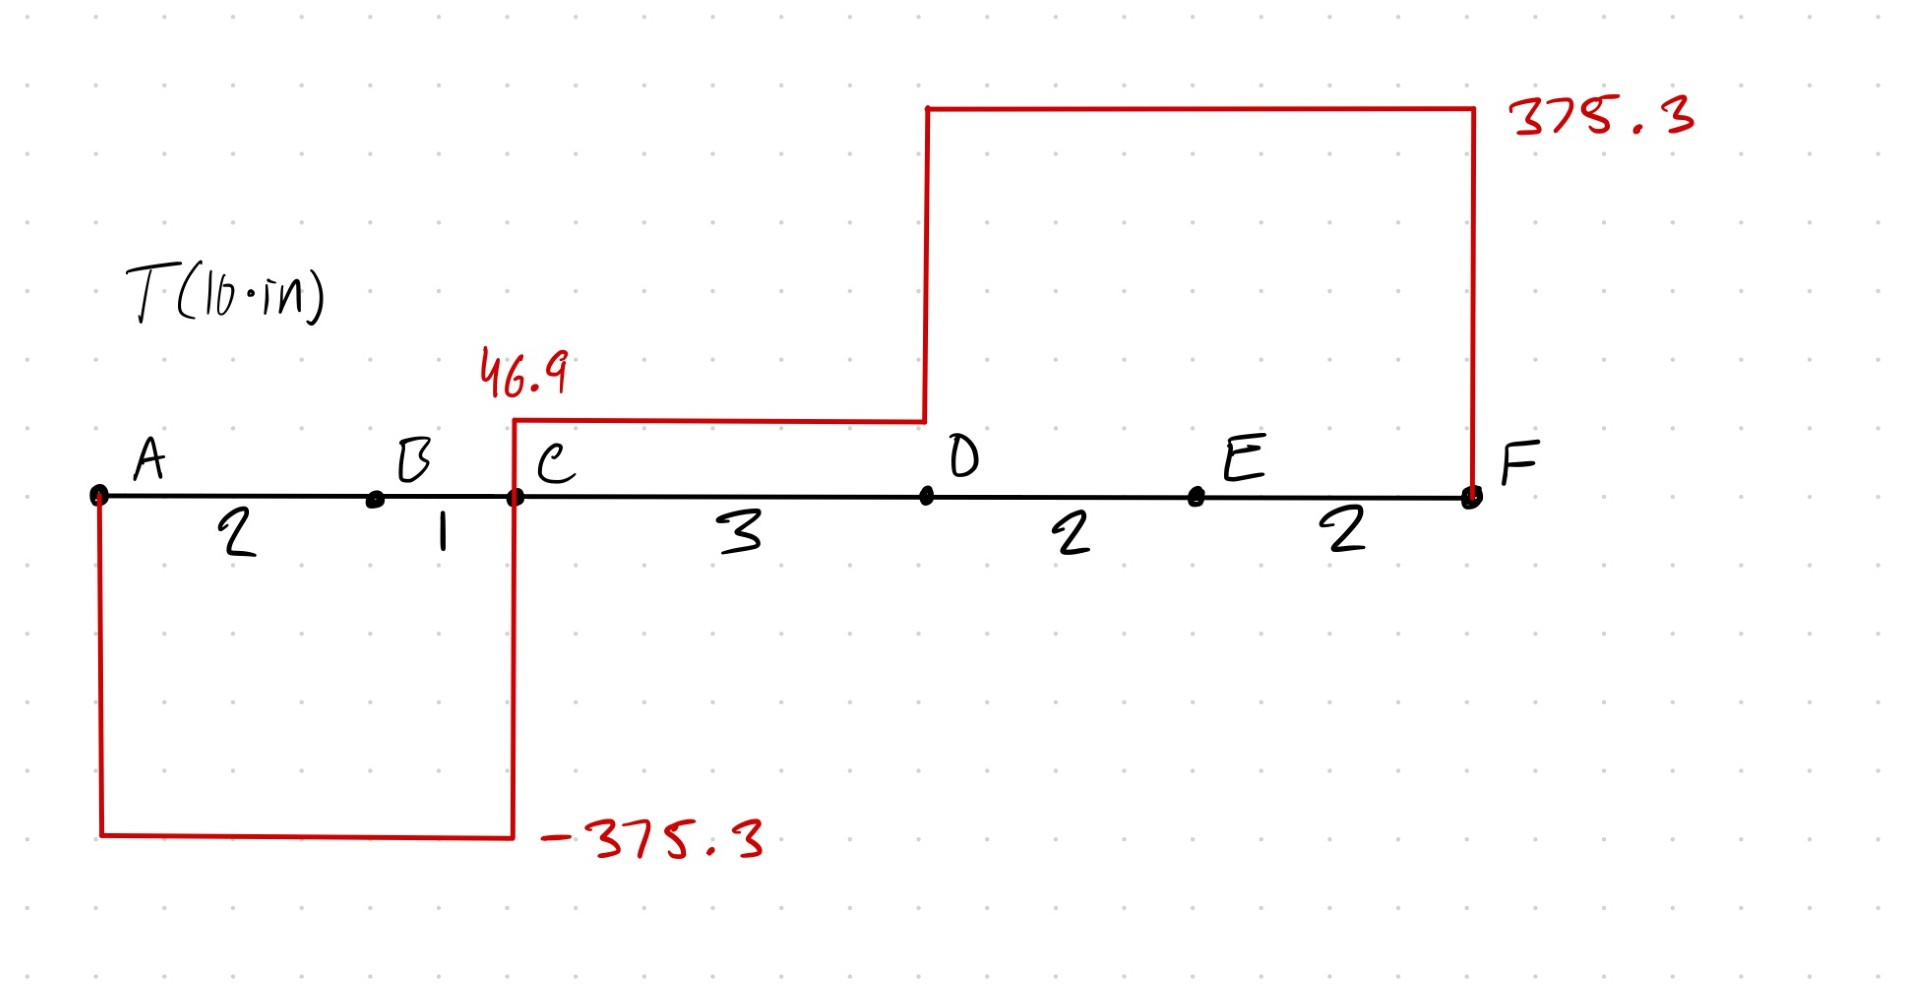

## Shear and Moments in x

In [239]:
t_abx = 0 # shear
t_bcx = - Bx
t_cdx = t_bcx + Cx
t_dex = t_cdx + Dx
t_efx = t_dex - Ex

t_abx, t_bcx, t_cdx, t_dex, t_efx

(0,
 np.float64(-215.63333333333335),
 np.float64(-50.433333333333366),
 np.float64(183.46666666666664),
 np.float64(-2.842170943040401e-14))

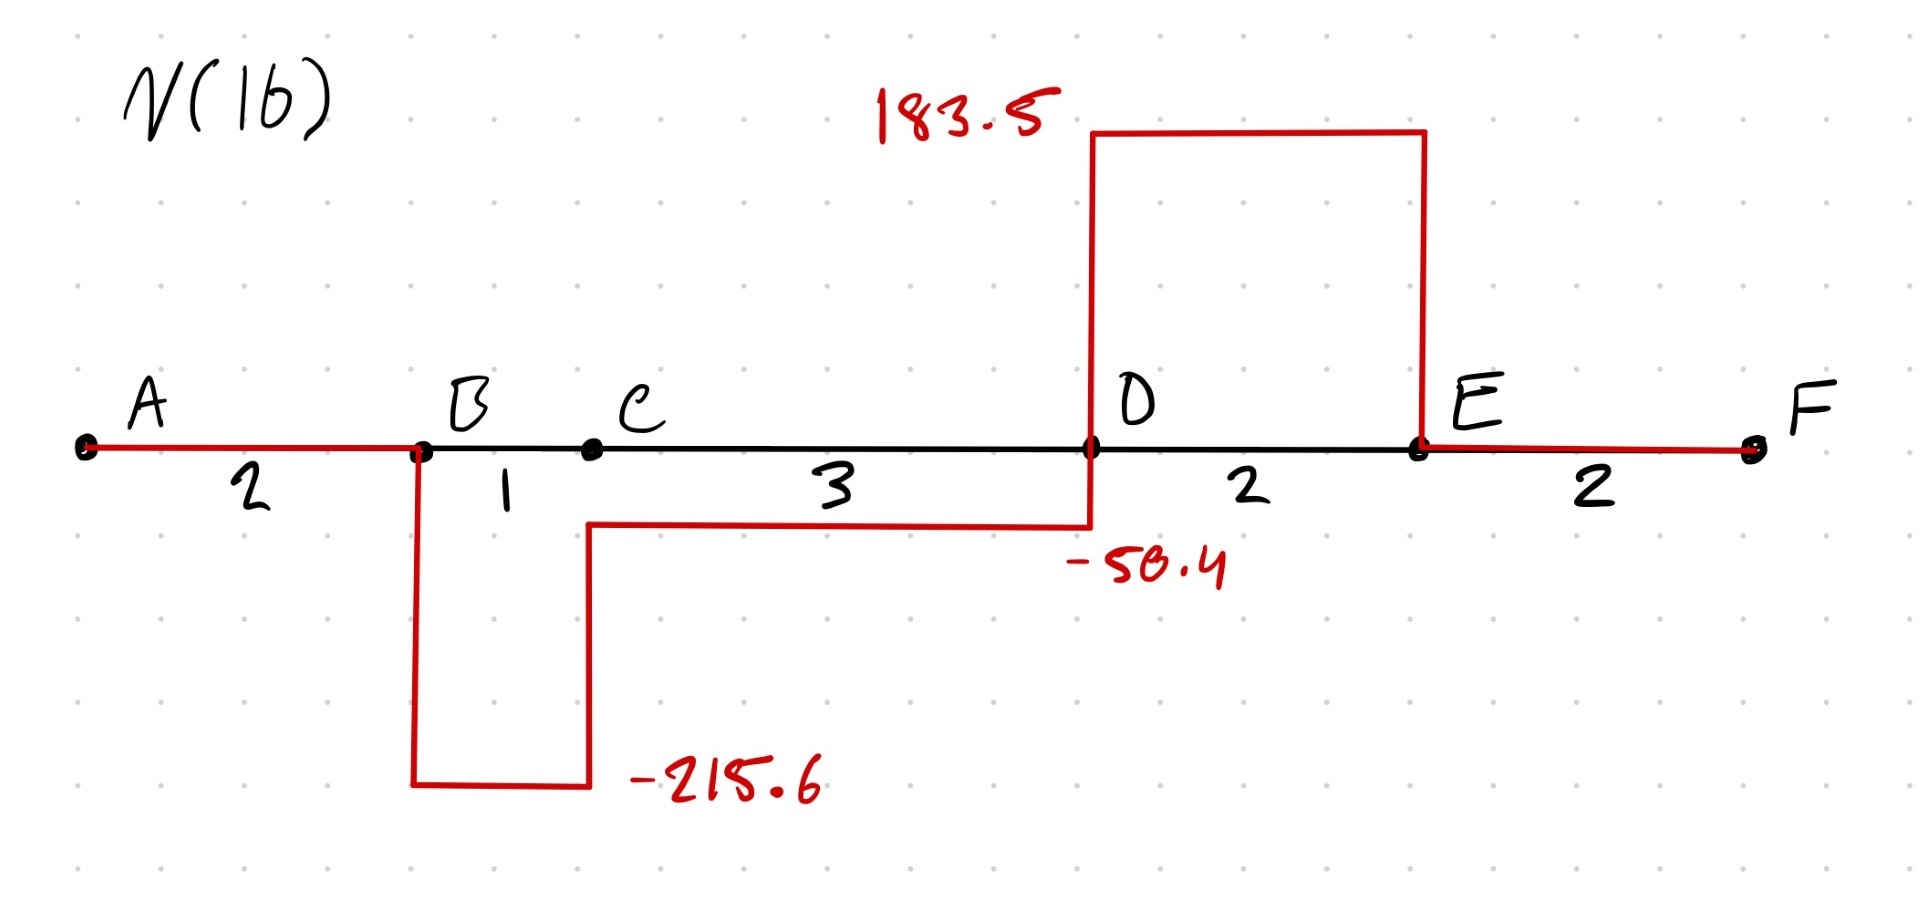

In [251]:
T_ax = 0 # moments

T_bx = T_ax + t_abx * AB 

T_cx = T_bx + t_bcx * BC

T_dx = T_cx + t_cdx * CD

T_ex = T_dx + t_dex * DE

T_fx = T_ex + t_efx * EF

T_ax, T_bx, T_cx, T_dx, T_ex, T_fx

(0,
 0,
 np.float64(-215.63333333333335),
 np.float64(-366.93333333333345),
 np.float64(-1.7053025658242404e-13),
 np.float64(-2.2737367544323206e-13))

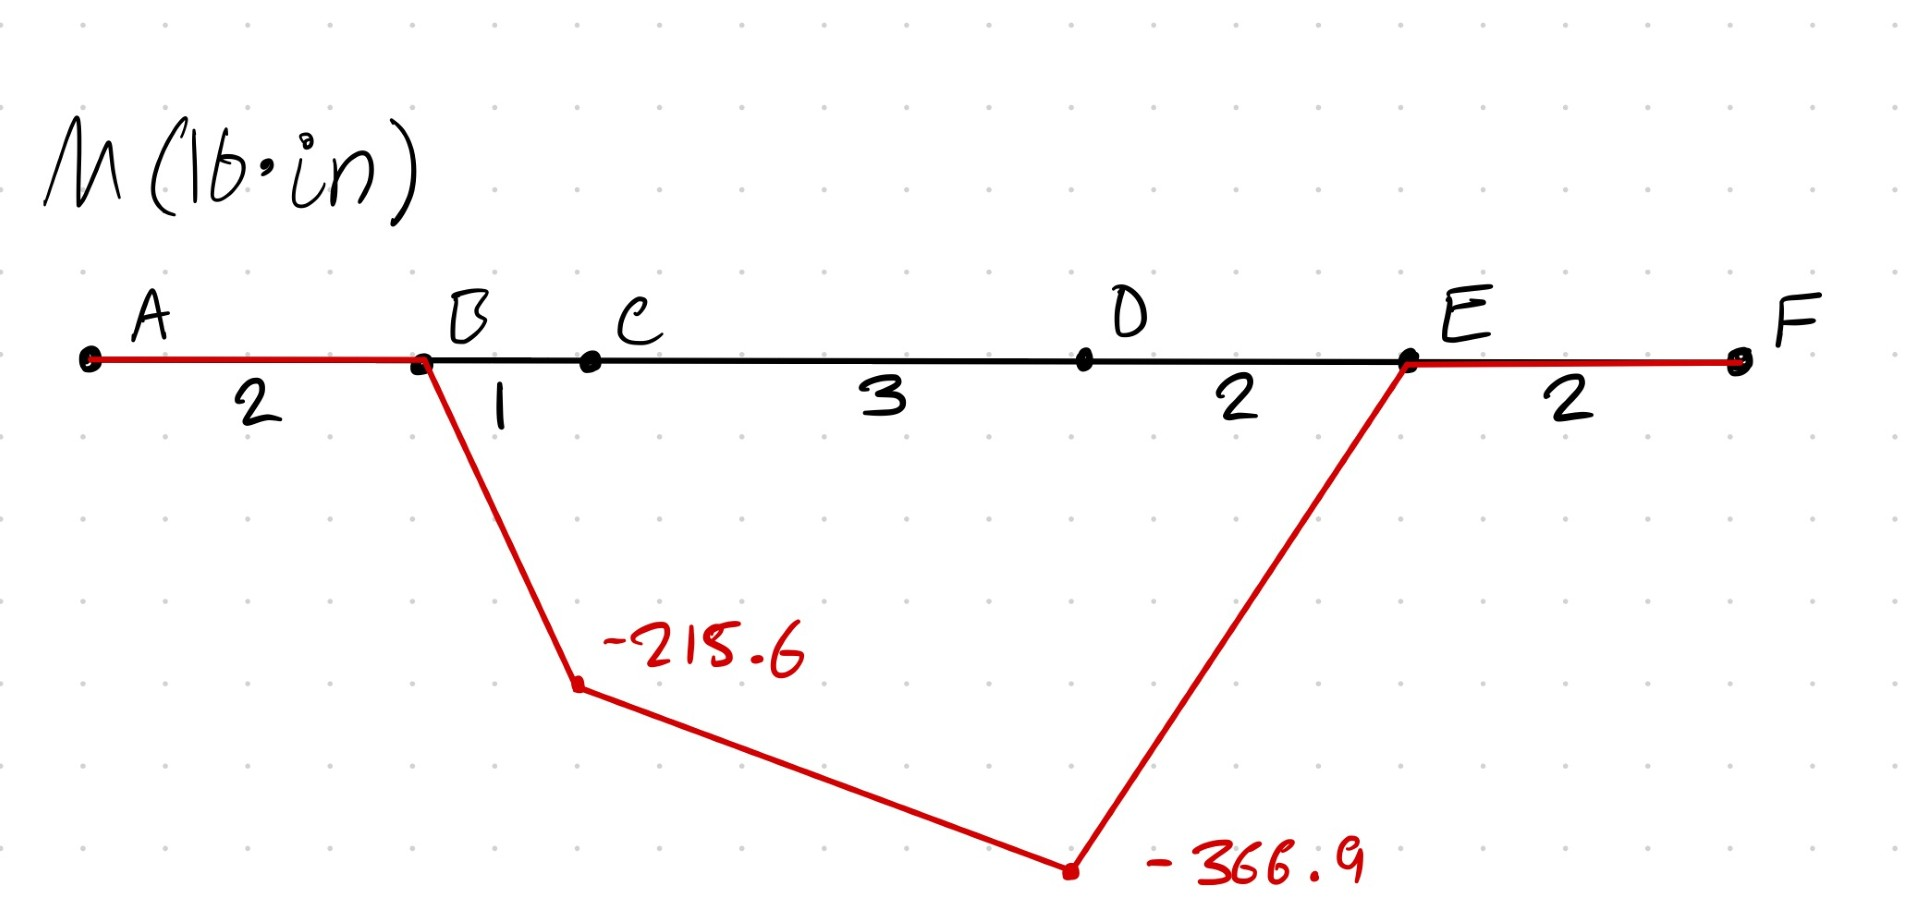

## Shear and Moments in z 

In [241]:
t_abz = 0 # shear
t_bcz = - Bz
t_cdz = t_bcz + Cz
t_dez = t_cdz + Dz
t_efz = t_dez - Ez

t_abz, t_bcz, t_cdz, t_dez, t_efz

(0,
 np.float64(-662.4166666666666),
 np.float64(-154.91666666666663),
 np.float64(563.5833333333334),
 np.float64(0.0))

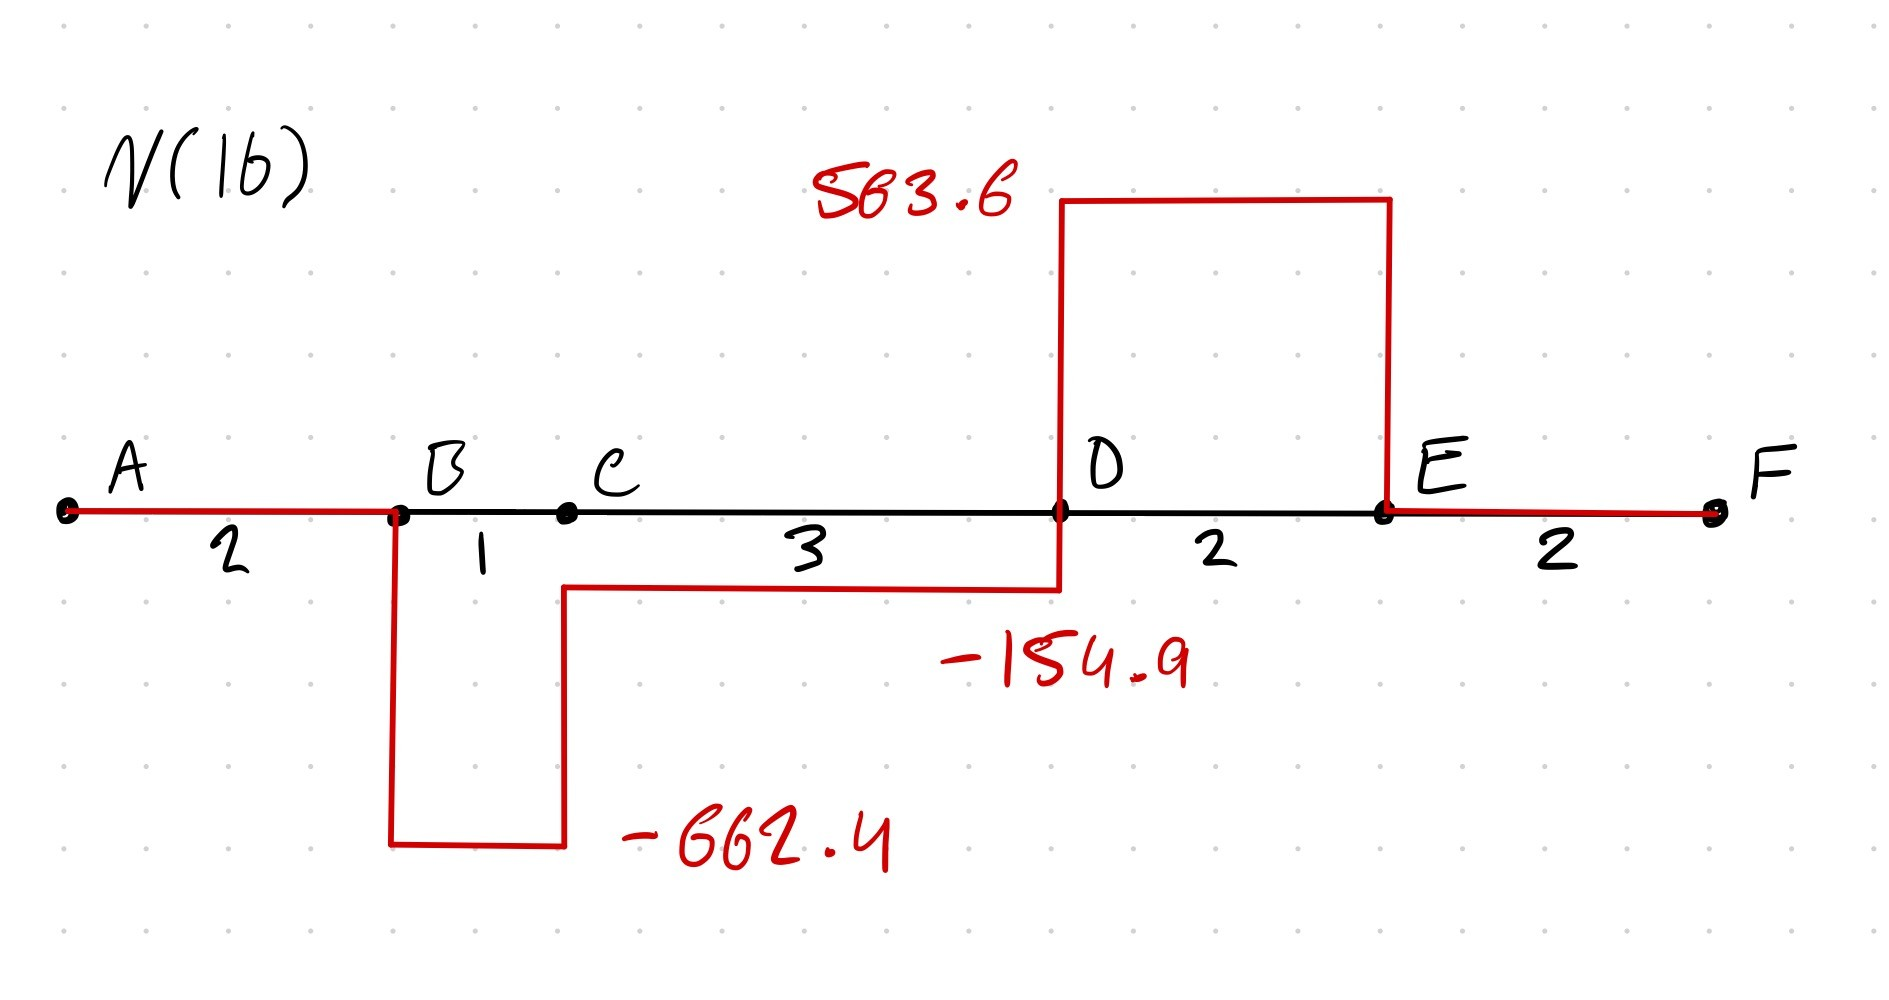

In [242]:
T_az = 0 # moments
T_bz = T_az + t_abz * AB 
T_cz = T_bz + t_bcz * BC
T_dz = T_cz + t_cdz * CD
T_ez = T_dz + t_dez * DE
T_fz = T_ez + t_efz * EF

T_az, T_bz, T_cz, T_dz, T_ez, T_fz

(0,
 0,
 np.float64(-662.4166666666666),
 np.float64(-1127.1666666666665),
 np.float64(2.2737367544323206e-13),
 np.float64(2.2737367544323206e-13))

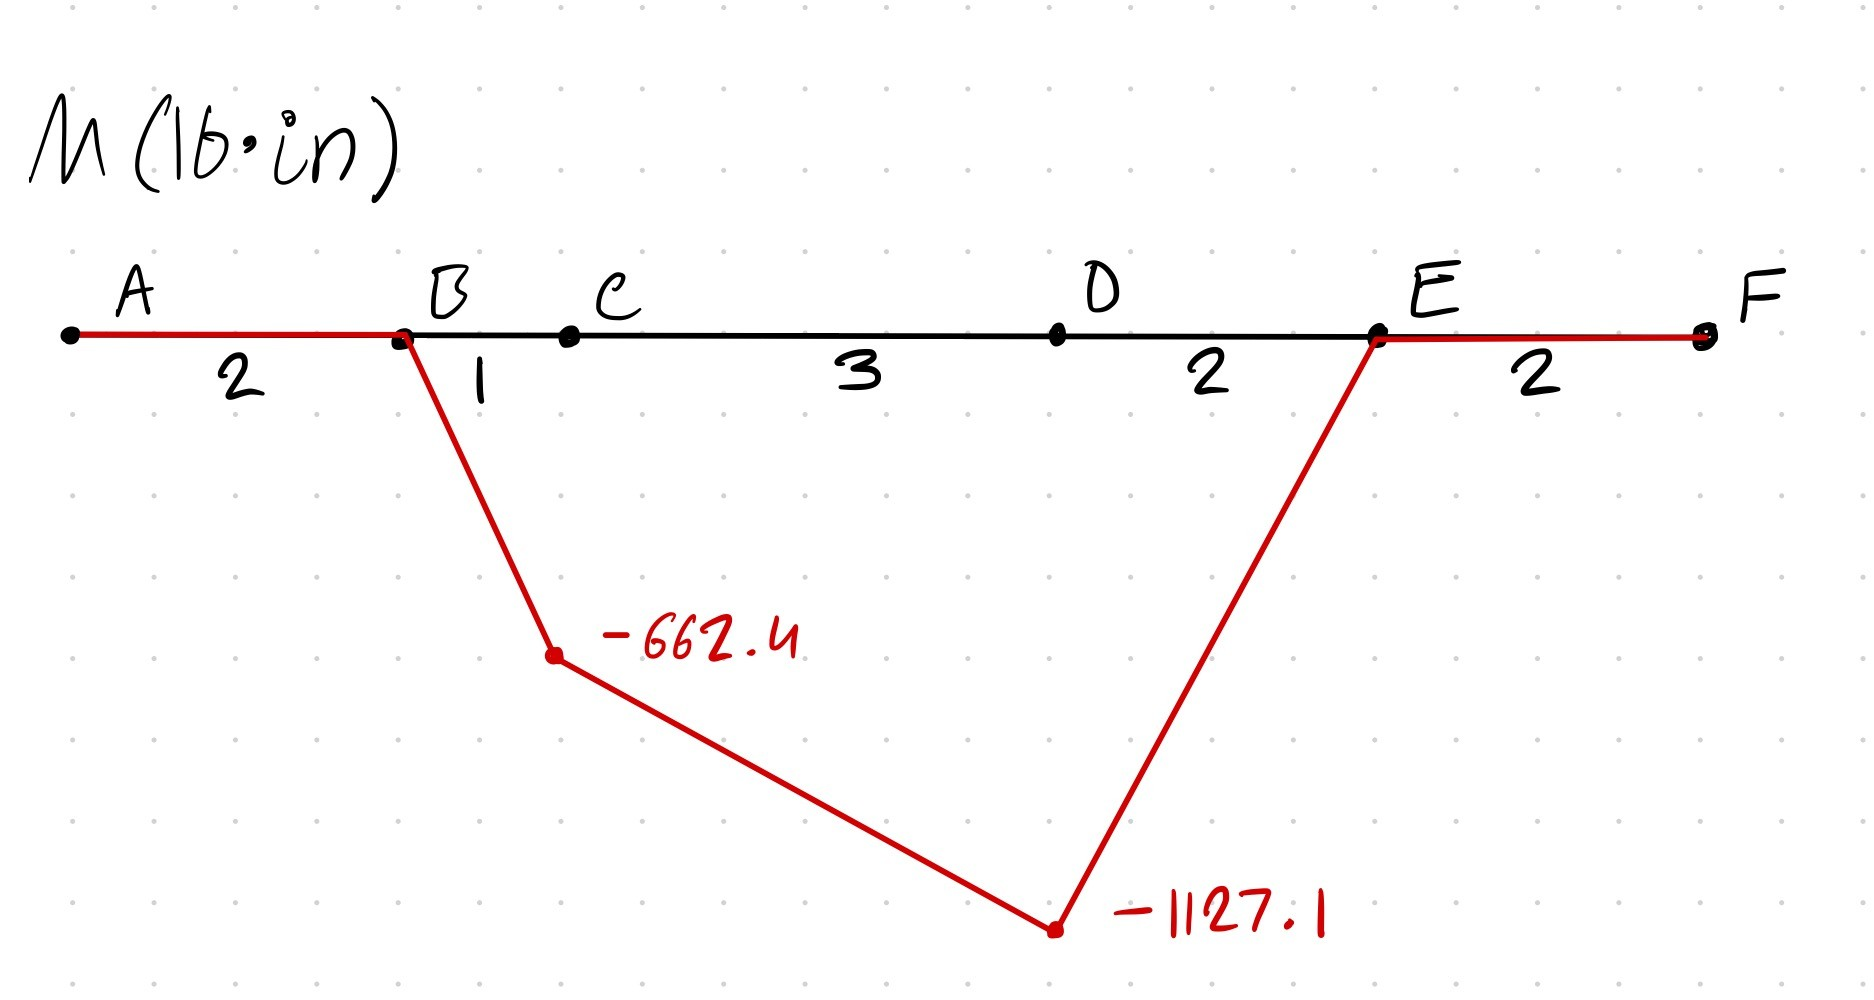

## Resultant Shear and Moments

In [243]:
V_ab = np.linalg.norm(np.array([t_abx, t_abz]))
V_bc = np.linalg.norm(np.array([t_bcx, t_bcz]))
V_cd = np.linalg.norm(np.array([t_cdx, t_cdz]))
V_de = np.linalg.norm(np.array([t_dex, t_dez]))
V_ef = np.linalg.norm(np.array([t_efx, t_efz]))

V_ab, V_bc, V_cd, V_de, V_ef

(np.float64(0.0),
 np.float64(696.6301563399493),
 np.float64(162.91928898145306),
 np.float64(592.6940116020145),
 np.float64(2.842170943040401e-14))

In [244]:
M_a = np.linalg.norm(np.array([T_ax, T_az]))
M_b = np.linalg.norm(np.array([T_bx, T_bz]))
M_c = np.linalg.norm(np.array([T_cx, T_cz]))
M_d = np.linalg.norm(np.array([T_dx, T_dz]))
M_e = np.linalg.norm(np.array([T_ex, T_ez]))
M_f = np.linalg.norm(np.array([T_fx, T_fx]))

M_a, M_b, M_c, M_d, M_e, M_f

(np.float64(0.0),
 np.float64(0.0),
 np.float64(696.6301563399493),
 np.float64(1185.3880232040287),
 np.float64(2.8421709430404007e-13),
 np.float64(3.2155493553843715e-13))

## Shaft Diameter Determination

The shaft will be made of a martensitic steel due to the marine application. We select SAE 416 Q&T 1400 from table A-6 in Mott; 

$S_u = 90 \text{ ksi}\\$

$S_y = 60 \text{ ksi}\\$

$S_n = 35 \text{ ksi}$, assuming machined/cold drawn, F-5 Mott

Assume wrought steel; $C_m = 1$

Only working with bending stress; $C_{st} = 1$

Assume 99% reliability; $C_R = 0.81$

Will guess 2" shaft; $C_s = 0.8$

All elements are held by retaining rings from both sides; $K_t = 3$

Assume a saftey factor; $N = 3$

Assume torque/moments dominate;

$D = \left(\frac{32N}{\pi} \sqrt{\left( \frac{K_t M}{S_n'}\right)^2  + \frac{3}{4}\left(\frac{T}{S_y} \right)^2}\right)^{\frac{1}{3}}$

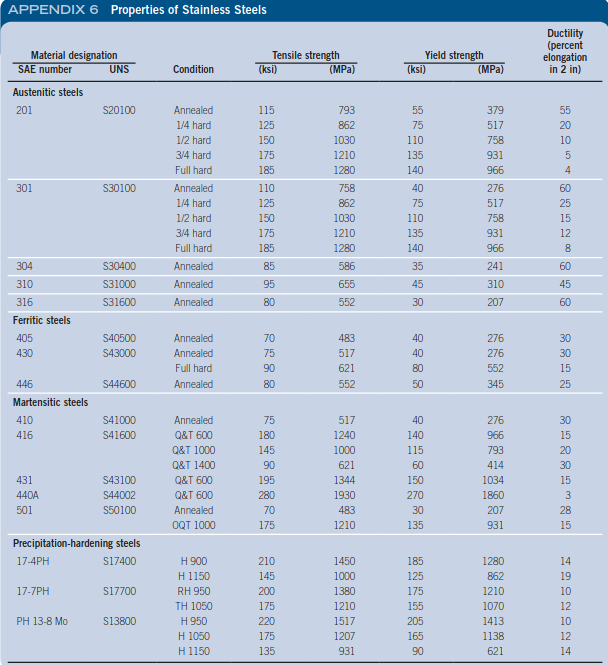
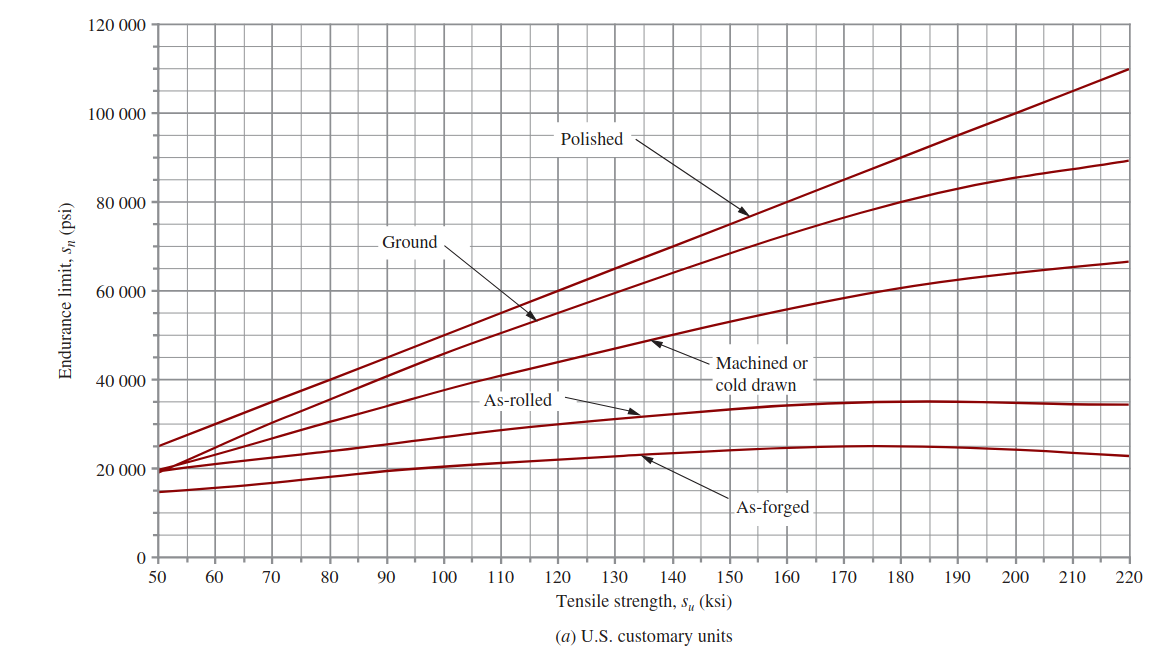

In [245]:
Su = 87 * 10**3
Sy = 60 * 10**3
Sn = 33 * 10**3
Cm = 1
Cst = 1
Cr = 0.81
Cs = 0.8
Kt = 3
N=3
Sn_p = Sn * Cm * Cst * Cr * Cs

In [246]:
def shaft_diameter(M, T):
    term1 = (Kt * M) / Sn_p
    term2 = (T / Sy)
    
    inside_sqrt = term1**2 + 0.75 * term2**2
    inside_cubic = (32 * N / np.pi) * np.sqrt(inside_sqrt)
    
    D = inside_cubic ** (1/3)
    return D

D_ab1 = shaft_diameter(M_a, Torque_AB)
D_ab2 = shaft_diameter(M_b, Torque_AB)
D_ab = max(D_ab1, D_ab2)

D_bc1 = shaft_diameter(M_b, Torque_BC)
D_bc2 = shaft_diameter(M_c, Torque_BC)
D_bc = max(D_bc1, D_bc2)

D_cd1 = shaft_diameter(M_c, Torque_CD)
D_cd2 = shaft_diameter(M_d, Torque_CD)
D_cd = max(D_cd1, D_cd2)

D_de1 = shaft_diameter(M_d, Torque_DE)
D_de2 = shaft_diameter(M_e, Torque_DE)
D_de = max(D_de1, D_de2)

D_ef1 = shaft_diameter(M_f, Torque_EF)
D_ef2 = shaft_diameter(M_f, Torque_EF)
D_ef = max(D_ef1, D_ef2)

D = max(D_ab, D_bc, D_cd, D_de, D_ef)
D = D * 1.06
D

np.float64(1.822723076069883)

The following figure from shigley is used to adjust our $C_s$ factor:

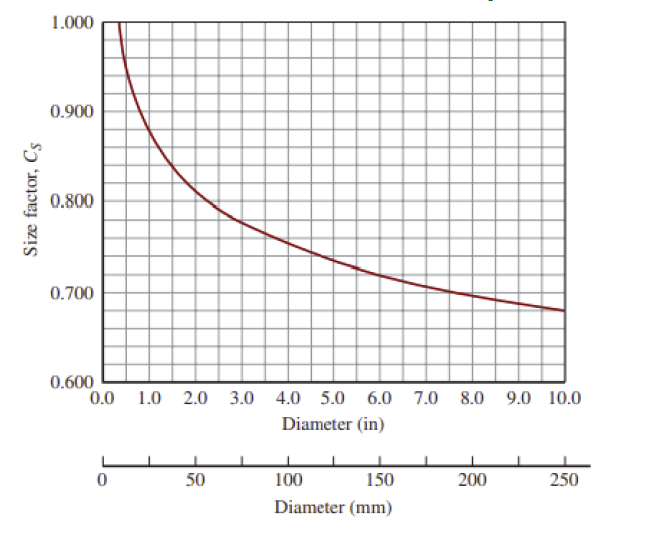

In [247]:
Cs = 0.82 # Adjusted for approximation to 1.75"
Sn_p = Sn * Cm * Cst * Cr * Cs
D_ab1 = shaft_diameter(M_a, Torque_AB)
D_ab2 = shaft_diameter(M_b, Torque_AB)
D_ab = max(D_ab1, D_ab2)

D_bc1 = shaft_diameter(M_b, Torque_BC)
D_bc2 = shaft_diameter(M_c, Torque_BC)
D_bc = max(D_bc1, D_bc2)

D_cd1 = shaft_diameter(M_c, Torque_CD)
D_cd2 = shaft_diameter(M_d, Torque_CD)
D_cd = max(D_cd1, D_cd2)

D_de1 = shaft_diameter(M_d, Torque_DE)
D_de2 = shaft_diameter(M_e, Torque_DE)
D_de = max(D_de1, D_de2)

D_ef1 = shaft_diameter(M_f, Torque_EF)
D_ef2 = shaft_diameter(M_f, Torque_EF)
D_ef = max(D_ef1, D_ef2)

D = max(D_ab, D_bc, D_cd, D_de, D_ef)
D = D * 1.06

NFS_SHAFT = ((1.75/1.06)**3 * np.pi) / (32 * np.sqrt((Kt * M_d / Sn_p)**2 + 0.75 * (Torque_DE / Sy)**2))

D, NFS_SHAFT

(np.float64(1.8077982173901768), np.float64(2.7213571321704997))

We select a 1.75" shaft made of SAE 416 Q&T 1400, to obtain a safety factor of ~2.72

## Keys

Both gears are bound to shaft with keys. We select a 0.5" square key shaft from table 11-1 in Mott since nominal shaft diameter falls between; 1.75" - 2.25". We select the keys to be made of SAE 1018; $S_y = 54 \text{ ksi}$ from table 11-4 of Mott.

In [248]:
D = 1.0
T_max = max(Torque_AB, Torque_BC, Torque_CD, Torque_DE, Torque_EF)
Sy_key = 54000
W = 0.5

L_min = (4 * T_max * N) / (D * W * Sy_key)

L_key = 0.25

NFS_key = (L_key * D * W * Sy_key) / (4 * T_max)

L_min, NFS_key


(np.float64(0.16679877777777777), np.float64(4.496435825202556))

We hence select a 0.5" square key made of SAE 1018, which is 0.25" long to ultimately yield a safety factor of ~4.5.

## Bearings

We will use Deep Groove Ball Bearings, just considering the dynamic loads at B and E slightly different (since B also experiences a thrust load). We select consider SKF parameters, and Stainless Steel bearings as we wish for our bearings to be non-corrosive (since they are in water). We are confined to selecting bearings with inner bore diameter of 1.75".

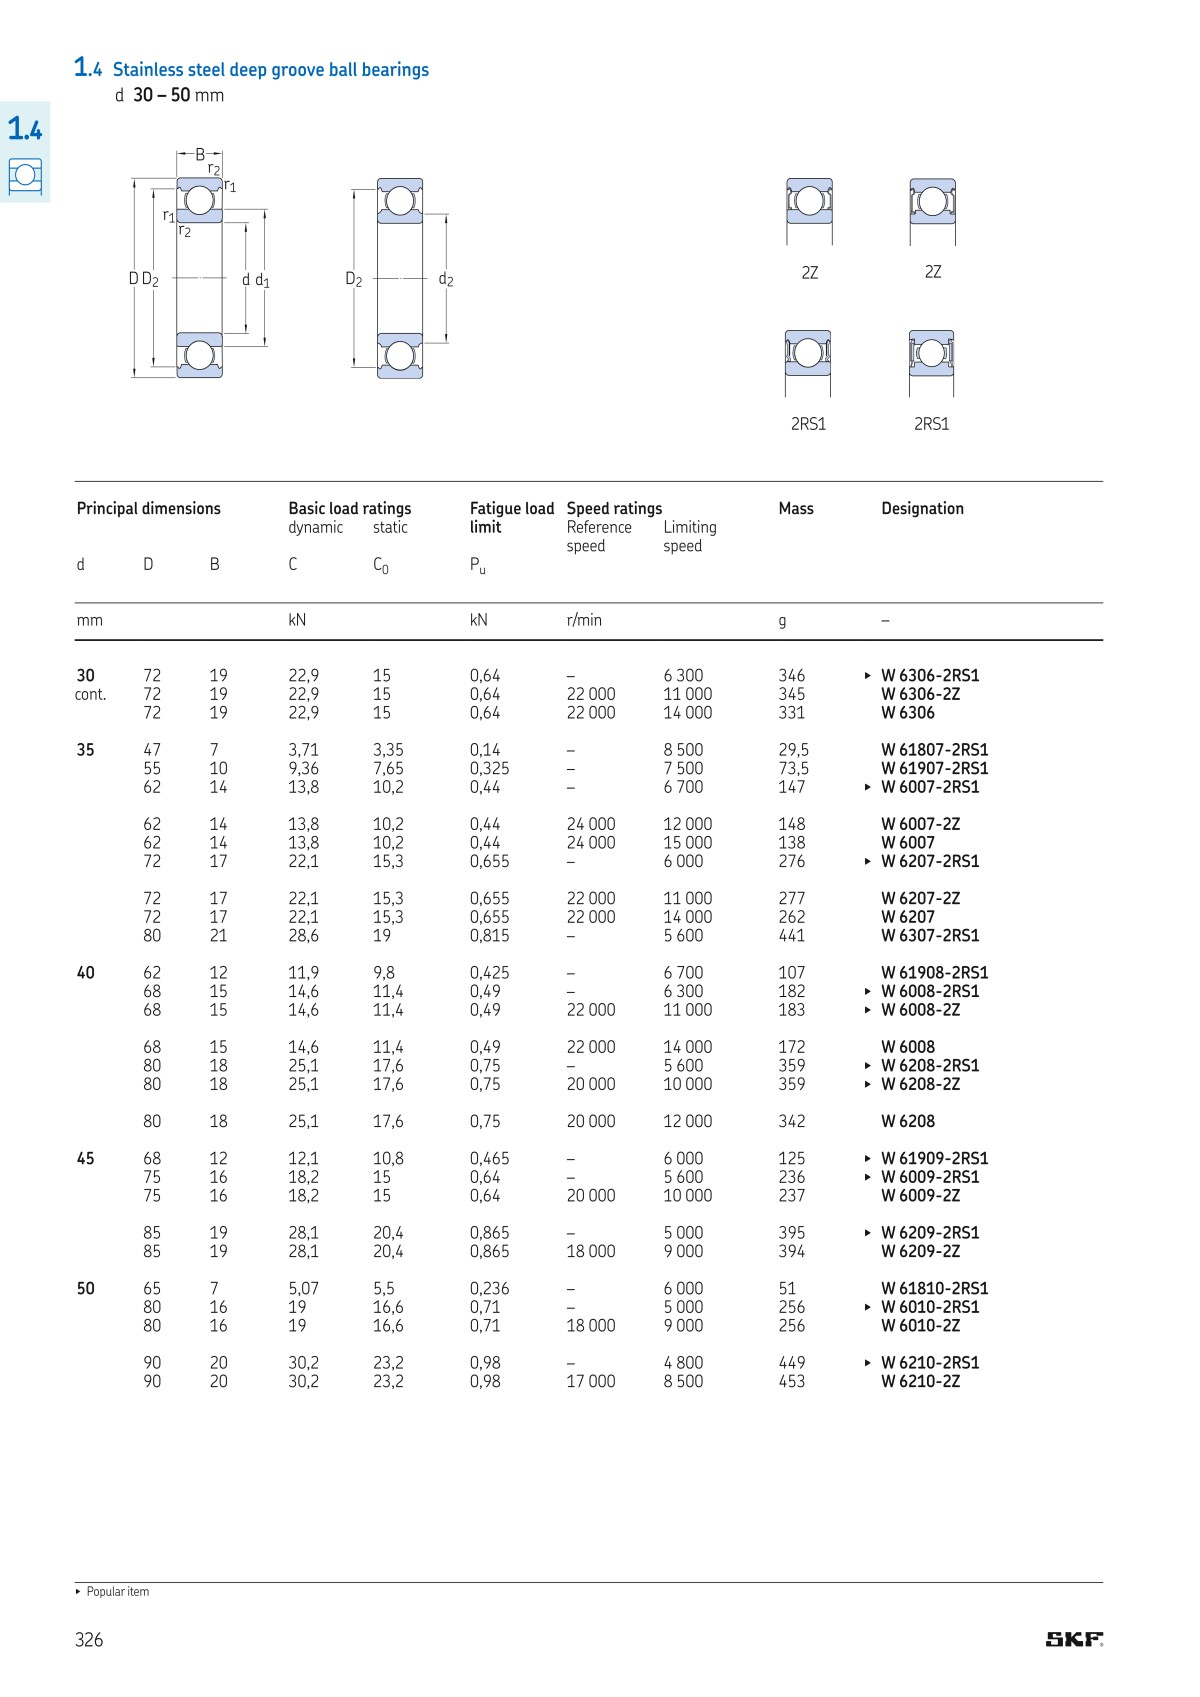

Per the above table, we select the W 6209-2RS1; this is a design listed as popular, hence it is easier to obtain and likely a little cheaper.  

Tolerance considerations are implicit here - a housing is not required here as the intention is to press fit the bearing into the housing of the gear box.

To then ensure the bearing is adequate, we determine the dynamic load at B and E, and compare it to that allowable for the bearing. We will also obtain our safety factor corresponding to the bearings at each location via this analysis as well. 

Note that we assume a combined reliability of 99% and are using SKF Weibull Parameters (since we are using an SKF bearing). We additionally select an application factor of 1.5 per Table 11-5 of Shigley, for a light to moderate impact loading. We also say the design life is 4000 hours per table 11-4 of Shigley (for intermittent use).

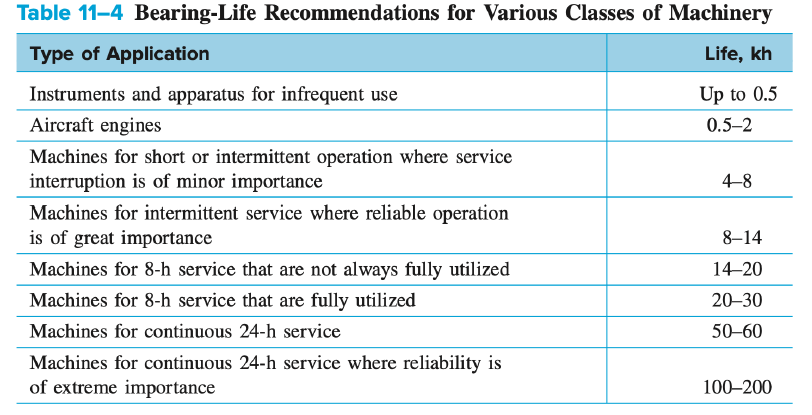

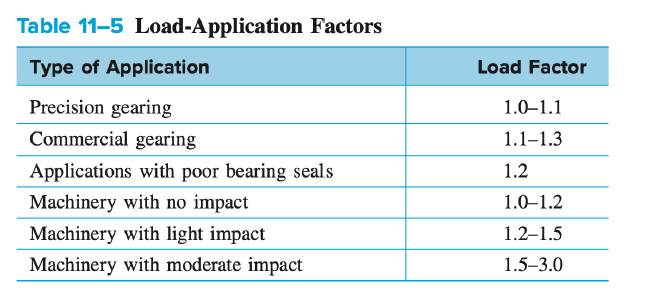

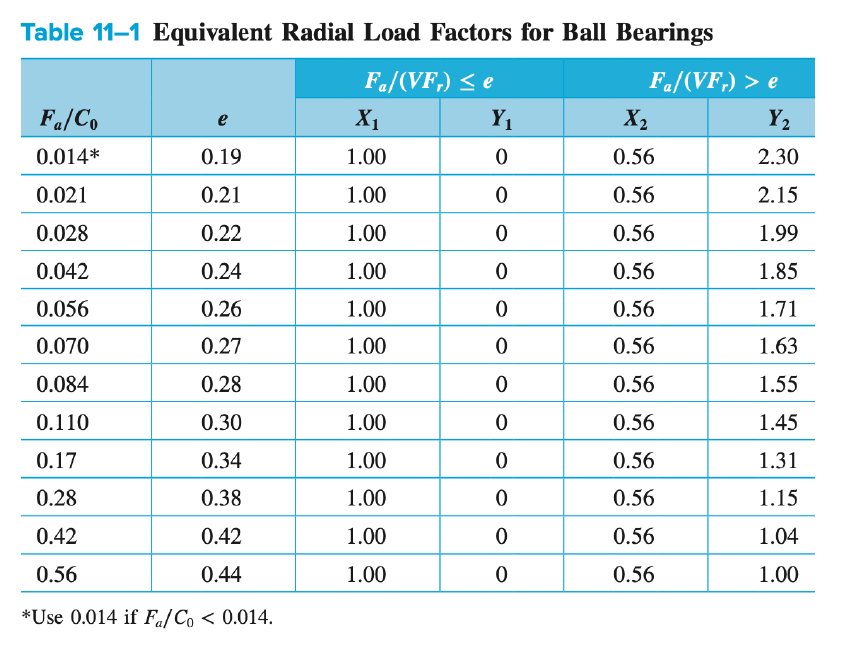

In [249]:
C10 = 6317.131 #lbf (28.1kN) from SKF catalogue for W 6009-2RS1 - dynamic load rating
C0 = 4586.102 #lbf (20.4kN) from SKF catalogue for W 6009-2RS1 - static load rating

R = np.sqrt(0.99)
n = 90 # rotation speed in rpm
af = 1.5 # application factor
L_D = 4000 # life in hours

x_D = (60 * L_D * n) / L_10

# SKF Weibull Parameters
L_10 = 10**6
x_0 = 0.02
theta = 4.459
b = 1.483

a = 3 # for ball bearings

# For Bearing B
V = 1 # inner ring rotates
AxialDynamicRatio = abs(By / C0) # about 0.005
e = 0.19 # by footnote to Table 11-1 of Shigley
AxialRadialRatio = abs(By/np.sqrt(Bx**2 + Bz**2)) # about 0.05

# e > AxialRadialRatio - the axial load is effectively neglected
X = 1
Y = 0

FB_e = X * V * np.sqrt(Bx**2 + Bz**2)

# Implicitly assume load factor of 1

C10_B = FB_e * af * (x_D/(x_0 + (theta - x_0) * (np.log(1/R))**(1/b)))**(1/a)
NFS_B = C10 / C10_B

# For Bearing E
V = 1 # inner ring rotates
FE_e = X * V * np.sqrt(Ex**2 + Ez**2)
C10_E = FE_e * af * (x_D/(x_0 + (theta - x_0) * (np.log(1/R))**(1/b)))**(1/a)
NFS_E = C10 / C10_E

C10_B, NFS_B, C10_E, NFS_E

(np.float64(5538.425114566881),
 np.float64(1.14060059842373),
 np.float64(4712.100630780212),
 np.float64(1.3406188651268327))

We hence have that the bearing at B has a safety factor of ~1.14, and the one at E has a safety factor of ~1.34.

## Cost Analysis

All costs are found on McMaster Carr as they are easily found and clearly listed there - the SKF brand bearings and housings would likely be in a lower price range nonetheless.

Shaft costs $97.58 (https://www.mcmaster.com/products/316-stainless-steel/highly-corrosion-resistant-316-stainless-steel-rods~~/?s=316-stainless-steel)

Bearing costs $156.94 x 2 (https://www.mcmaster.com/products/stainless-steel-bearings/ball-bearings-1~/?s=stainless-steel-bearings)

Cost of keys and retaining rings assumed to be negligible (easily obtained/manufactured via UBC machine shop and other sources)

## Safety Factors of Existing Design

In [250]:
# Assume same material, just different diameter
D_old = 0.625

NFS_shaft_old = ((D_old/1.06)**3 * np.pi) / (32 * np.sqrt((Kt * M_d / Sn_p)**2 + 0.75 * (Torque_CD / Sy)**2))

# Assume a worst case for stainless steel bearing of old inner bore size (W61802-2RS1)
C10_old_bearing = 370.9

NFS_old_bearing = C10_old_bearing / C10_E

NFS_shaft_old, NFS_old_bearing

(np.float64(0.12403652340184368), np.float64(0.07871224090105812))

Old designs appear to be greatly under-speced; the existing system has likely not yet failed because of how little it has been used, and the less than extreme treatment it has likely been subjected to (we assessed for a performance case, and not a recreational case).